## 우체국 쇼핑몰 데이터 수집

In [20]:
#크롤링 패키지 입력
import requests
from bs4 import BeautifulSoup
import os
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

| 대분류 | 중분류 | 소분류 |
|-|-|-|
| 농산물 | 곡물류 | 쌀 |

In [2]:
#중분류 기준 분류기호 입력
category=[101201000,101202000,101203000,101204000,101205000,101206000,102201000,102202000,102203000,102204000,102205000,102206000,102207000,102208000,103201000,103202000,103203000,104201000,104202000,104203000,104204000,104205000,104206000,104207000,104208000,105201000,106201000,106202000,106203000,106204000,106205000,106206000,106207000,106208000,106209000,106210000,107201000,107202000,107203000,107204000,107205000,107206000,107207000,107208000,107209000,108201000,108202000,108203000,108204000,108205000,108206000,108207000,108208000,109201000,109202000,109203000,109204000,109205000,109206000,109207000,110201000,110202000,110203000,111201000
]

In [3]:
postmall = []
#분류 기호별 데이터 수집
for cat_num in category:
    temp=("https://mall.epost.go.kr/display/viewMCategory.do?ctgryCd="+str(cat_num))
    page = 1
    while True :
        url=(temp+"&currentPage="+str(page)+"&rowsperPage=45&goodsStus=01&orderBy=REQ&showGoodsList=I&reSearch=&searchWhereSet=&reSearchOption=1&pavlnDivCd=")
        req = requests.get(url)
        html = req.text
        soup = BeautifulSoup(html, 'html.parser')
        #제품면 HTML 위치
        product = soup.select('ul > li > a > div.goods_text > p')
        cat = soup.select('#contents > div.history_box > div > a')
        pcat = soup.select('#contents > div.history_box > div > span')
        for item in zip (product):
            postmall.append(
                {
                'prodcut_name' : item[0].text.replace('\n','').replace('\t','').replace('\r',''),
                'sub_label' : cat[0].text,
                'label' : pcat[0].text,
                }
            )
        page = page + 1
        #해당 분류에 제품이 없을 때 까지 페이지를 넘겨가며 제품 수집
        if not product:
            break
            

In [4]:
#데이터 프레임으로 저장
import pandas as pd
data = pd.DataFrame(postmall)

In [5]:
#데이터 모양(개수) 확인
data.shape

(66290, 3)

In [6]:
#데이터 해드 확인
data.head()

,prodcut_name,sub_label,label
0,10%동인 서리태 가루 180g/통,곡물류,농산물
1,거창푸르내우렁이쌀,곡물류,농산물
2,맑음이잡곡세트,곡물류,농산물
3,12%[2020년산 햅쌀] 김제 10인농부의 맛있는 햅쌀10kg(등급:상),곡물류,농산물
4,[보령장터]만세보령쌀 삼광미 GOLD 10kg (상등급),곡물류,농산물


In [7]:
#CSV로 데이터 저장
data.to_csv('postkmall.csv')

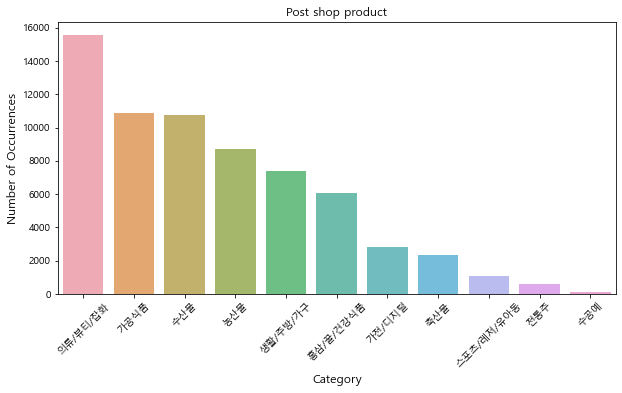

In [22]:
count=data['label'].value_counts(sort=True, ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Post shop product')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()

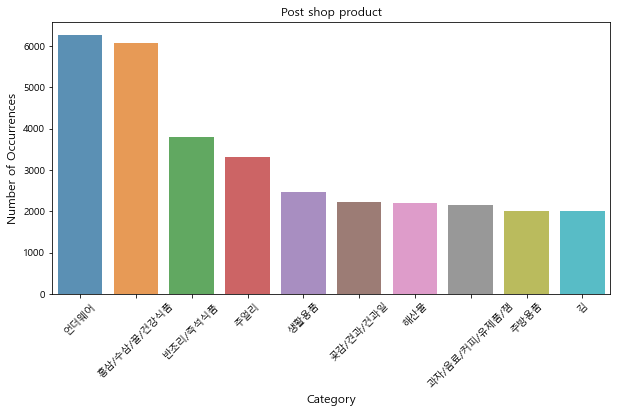

In [26]:
count=data['sub_label'].value_counts(sort=True, ascending=False)
count=count[:10]
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Post shop product')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.show()